References
- https://github.com/wooheaven/Python-Study/blob/master/06_MatrixProfile/02_matrixprofile-ts/02_Matrix_Profile_NYC_Taxi.ipynb

In [1]:
# !pip install matrixprofile-ts

In [2]:
from matrixprofile import *
from matrixprofile.discords import discords
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## NYC Taxi dataset

In [3]:
df_oc = pd.read_csv('./data/realTraffic/occupancy_6005.csv')
df_oc.head()
df_oc['timestamp'] = pd.to_datetime(df_oc['timestamp'])
df_oc['value'] = pd.to_numeric(df_oc['value'])
df_oc.head()

,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50


,timestamp,value
0,2015-09-01 13:45:00,3.06
1,2015-09-01 13:50:00,6.44
2,2015-09-01 13:55:00,5.17
3,2015-09-01 14:00:00,3.83
4,2015-09-01 14:05:00,4.50


In [4]:
df_oc = df_oc.set_index('timestamp').sort_index()
df_oc.head()

,value
timestamp,
2015-09-01 13:45:00,3.06
2015-09-01 13:50:00,6.44
2015-09-01 13:55:00,5.17
2015-09-01 14:00:00,3.83
2015-09-01 14:05:00,4.50


In [5]:
df_oc.dtypes

value    float64
dtype: object

In [6]:
#total data
df_oc.__len__()

2380

In [7]:
# sum passenger count
df_oc.sum()

value    10698.45
dtype: float64

### Resample Data to 1H

In [8]:
df_re = df_oc.resample('1H').sum()
df_re.head()

,value
timestamp,
2015-09-01 13:00:00,14.67
2015-09-01 14:00:00,71.88
2015-09-01 15:00:00,1.67
2015-09-01 16:00:00,0.00
2015-09-01 17:00:00,32.49


In [9]:
df_re.shape

(388, 1)

In [10]:
df_oc.idxmax()

value   2015-09-15 06:55:00
dtype: datetime64[ns]

### Matrix Profile

In [11]:
s = df_oc.values.squeeze()
# subsequence length to compute the matrix profile
# data exists every 15 min
# length of m
m =  int(24*(60/15))

In [12]:
profile = matrixProfile.stomp(s, m)

In [13]:
df_oc['profile'] = np.append(profile[0], np.zeros(m-1)+np.nan)

In [14]:
df_oc['profile_index'] = np.append(profile[1], np.zeros(m-1) + np.nan)

In [15]:
df_oc.head()

,value,profile,profile_index
timestamp,,,
2015-09-01 13:45:00,3.06,6.317355,889.0
2015-09-01 13:50:00,6.44,6.220131,890.0
2015-09-01 13:55:00,5.17,6.157656,891.0
2015-09-01 14:00:00,3.83,6.173078,892.0
2015-09-01 14:05:00,4.50,6.135467,893.0


### Visualize

Text(0,0.5,'NYC Taxi Raw')

Text(0,0.5,'Matrix Profile')

Text(0.5,0,'Time Series Index')

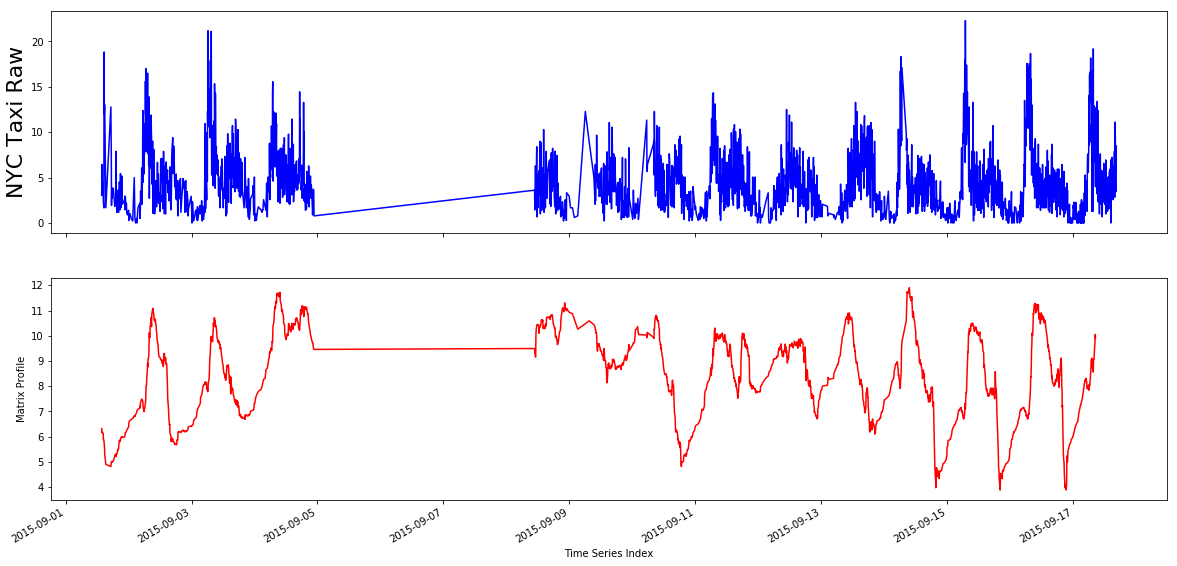

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
df_oc['value'].plot(ax=ax1, kind='line', c='b')
ax1.set_ylabel('NYC Taxi Raw', size=22)

df_oc['profile'].plot(ax=ax2, kind='line', c='r')
ax2.set_ylabel('Matrix Profile')
ax2.set_xlabel('Time Series Index')


In [17]:
df_oc['2015-09-05':'2015-09-09']
# missing data

,value,profile,profile_index
timestamp,,,
2015-09-08 10:44:00,3.61,9.493299,1055.0
2015-09-08 10:49:00,1.44,9.332132,1056.0
2015-09-08 10:59:00,4.28,9.252697,1057.0
2015-09-08 11:04:00,6.28,9.163085,1058.0
2015-09-08 11:09:00,4.61,9.153763,1059.0
2015-09-08 11:14:00,5.28,9.935606,1060.0
2015-09-08 11:19:00,2.06,10.226418,1061.0
2015-09-08 11:29:00,7.50,10.326666,1062.0
2015-09-08 11:34:00,8.39,10.423692,870.0


In [18]:
# exclude upto 12 hours from left and right
ex_zone = 12
anoms = discords(df_oc['profile'], ex_zone, k=15)

In [19]:
df_oc.iloc[anoms].sort_values(by='profile', ascending=False)

,value,profile,profile_index
timestamp,,,
2015-09-14 09:33:00,5.83,11.903914,776.0
2015-09-04 09:42:00,2.17,11.724296,1573.0
2015-09-14 10:33:00,1.83,11.362130,698.0
2015-09-08 22:12:00,0.67,11.302731,1820.0
2015-09-16 09:29:00,3.61,11.280263,755.0
2015-09-04 08:02:00,7.72,11.231968,1538.0
2015-09-16 10:44:00,8.67,11.227347,1354.0
2015-09-04 18:07:00,5.56,11.187221,2154.0
2015-09-04 19:07:00,2.33,11.153116,1009.0
